In [1]:
import numpy as np
from numpy.linalg import inv
from scipy.stats import multivariate_normal
import scipy
import matplotlib.pyplot as plt

from HugHop.StandardHugHop import HugHop
from HugHop.HessianHugHop import HugHopPC
from utils import quick_MVN_scatter, quick_MVN_marginals

In [2]:
# Target Distribution
mu = np.zeros(2)
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])
target = multivariate_normal(mu, Sigma)
grad_log_pi = lambda xy: - inv(Sigma) @ xy

# Symmetric Proposal Distribution for the Velocity
q = multivariate_normal(np.zeros(2), np.eye(2))

# Settings
x0 = target.rvs()     # Starting point
T = 0.1 
B = 5 
N = 50000
l = 2.0     
k = 1.0
burnin = 50000

# Standard Hug and Hop

In [3]:
samples, _, _ = HugHop(T, B, x0, q, target.logpdf, grad_log_pi, l, k).sample(N)

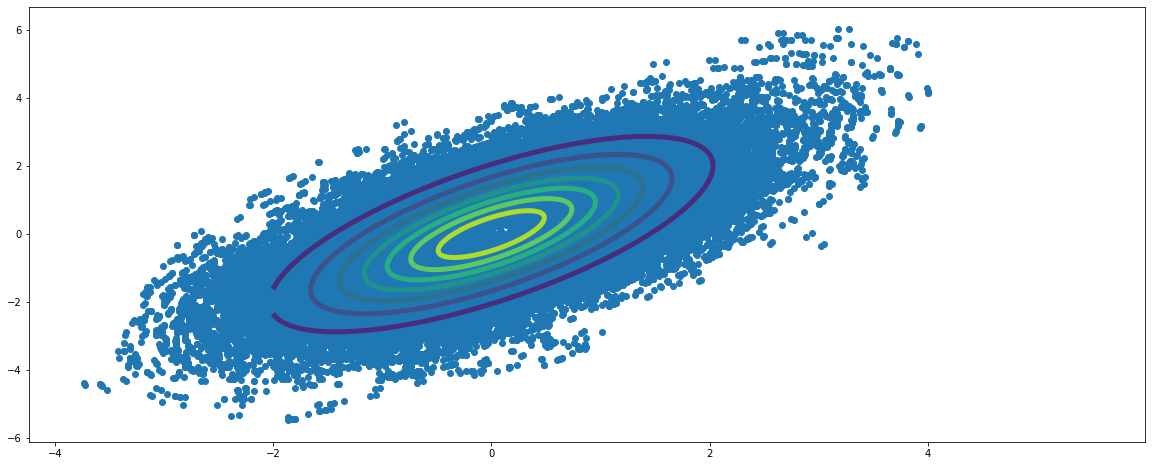

In [4]:
quick_MVN_scatter(samples, target)

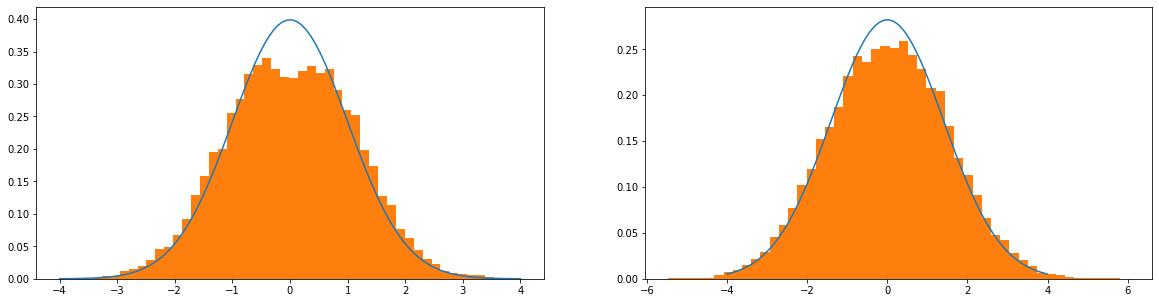

In [5]:
quick_MVN_marginals(samples, target)

# Hug and Hop with Preconditioning (Hessian)

In [6]:
samplesH, _, _ = HugHopPC(T, B, x0, q, target.logpdf, grad_log_pi, l, k, burnin).sample(N)

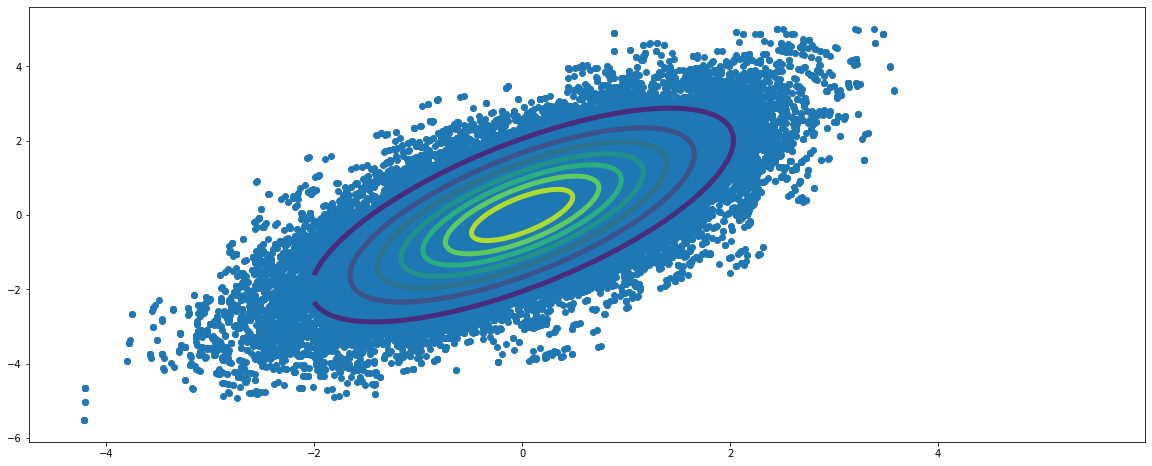

In [7]:
quick_MVN_scatter(samplesH, target)

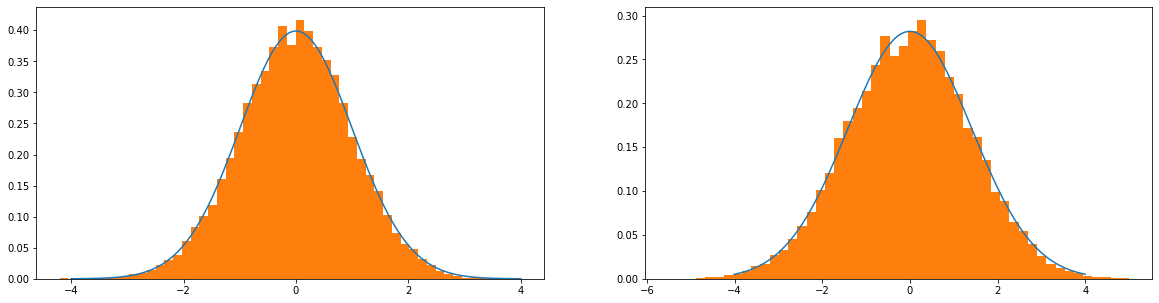

In [8]:
quick_MVN_marginals(samplesH, target)